# Catatan Kerja Proyek

<table align="left">
    <tr>
        <td style="text-align:left">Kode Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">10S3001</td>
    </tr>
    <tr>
        <td style="text-align:left">Nama Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">Kecerdasan Buatan</td>
    </tr>
    <tr>
        <td style="text-align:left">Judul Proyek</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>Image Classification</i></td>
    </tr>
    <tr>
        <td style="text-align:left">Nama Kelompok</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>RED</i></td>
    </tr>
    <tr>
        <td style="text-align:left">NIM/Nama Anggota</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>
        - 12S20012   Ary Aritonang<br> 
        - 12S20019   Yehezchiel Sibuea <br> 
        - 12S20032   Permana Panjaitan</i></td>
    </tr>
</table>

In [13]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [15]:
# Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [19]:
# Select the "dog" and "cat" classes
idx = np.squeeze((y_train == 5) | (y_train == 3))
x_train = x_train[idx]
y_train = y_train[idx]
idx = np.squeeze((y_test == 5) | (y_test == 3))
x_test = x_test[idx]
y_test = y_test[idx]

In [20]:
# Preprocess the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [22]:
# Map labels to values 0 and 1
y_train[y_train == 3] = 0
y_train[y_train == 5] = 1
y_test[y_test == 3] = 0
y_test[y_test == 5] = 1

In [23]:
# Convert the labels to categorical
y_train = to_categorical(y_train.astype(int))
y_test = to_categorical(y_test.astype(int))

In [24]:
# Create the model
model = Sequential()

In [26]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


In [27]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Fit the model to the training data
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
157/157 [==============================] - 35s 214ms/step - loss: 0.6794 - accuracy: 0.5711 - val_loss: 0.6672 - val_accuracy: 0.6075
Epoch 2/10
157/157 [==============================] - 37s 235ms/step - loss: 0.6240 - accuracy: 0.6503 - val_loss: 0.5824 - val_accuracy: 0.6820
Epoch 3/10
157/157 [==============================] - 31s 199ms/step - loss: 0.5752 - accuracy: 0.7009 - val_loss: 0.5264 - val_accuracy: 0.7355
Epoch 4/10
157/157 [==============================] - 32s 207ms/step - loss: 0.5346 - accuracy: 0.7334 - val_loss: 0.5069 - val_accuracy: 0.7450
Epoch 5/10
157/157 [==============================] - 32s 204ms/step - loss: 0.4986 - accuracy: 0.7544 - val_loss: 0.4693 - val_accuracy: 0.7725
Epoch 6/10
157/157 [==============================] - 32s 204ms/step - loss: 0.4574 - accuracy: 0.7846 - val_loss: 0.4415 - val_accuracy: 0.7925
Epoch 7/10
157/157 [==============================] - 32s 203ms/step - loss: 0.4313 - accuracy: 0.7988 - val_loss: 0.5206 - val_ac

In [29]:
# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4439886510372162
Test accuracy: 0.8004999756813049


In [30]:
# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [31]:
epochs_range = range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

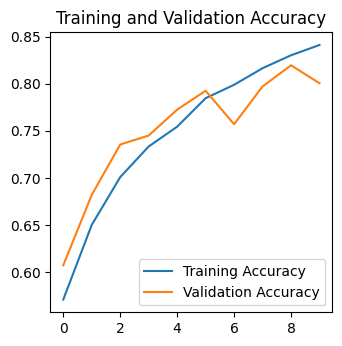

In [32]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

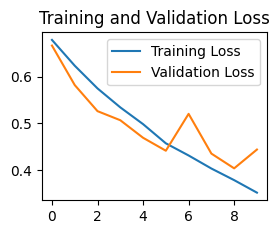

In [33]:

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
# Save the model
model.save('animal_classifier.h5')